# Selecting Master Sample for Virgo Filament Survey #

### Post ISSI 2019 ###

- Gianluca has made a master sample from Hyperleda
- In Bern, we were trying to reproduce the steps he took to:
    - cross-match with NSA, and 
    - remove spurious detections
- Gianluca matched according to NED name.
- RF is going to do the same thing but matching according to RA and DEC.

## Hyperleda Advantages ##

- has more redshift independent distances
- has more sources


## Questions ##
- why does NSA stop at dec = 0, when SDSS goes almost to -10 in that region
   - NSA is DR8

# Hyperleda #

Gianluca ran query in two regions
- region covered by Kim+2016
- extension region
- which do we want?

### Query Webpage ###
http://leda.univ-lyon1.fr/leda/fullsql.html


### Hyperleda Query ###

```
select
objname,objtype,de2000,al2000,v,e_v,vopt,e_vopt,vrad,e_vrad,bt,e_bt,type,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
where de2000 > -35 and de2000 < 60 and al2000 < 16  and al2000 >
115./360.*24.  and v < 3300 and objtype='G'


```
### Hyperleda Extension Region Query ###
```
select objname,objtype,de2000,al2000,v,e_v,vopt,e_vopt,vrad,e_vrad,bt,e_bt,type,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
where ((de2000 >= 60 and de2000 < 75 and al2000 > 100./360.*24. and
al2000 < 280./360.*24.) or (de2000 > -35 and de2000 < 60 and al2000 >=
16. and al2000 < 280./360.*24.) or (de2000 > -35 and de2000 < 60
and al2000 > 100./360.*24. and al2000 <= 115./360.*24.)) and v < 3300
and objtype='G'


```


- chose separator as ,
- set null value to blank

- saved as hyperleda-finn-11Nov19.csv (even though its a cgi file)
- loaded in emacs and removed header info

In [230]:
from astropy.io import ascii, fits
from matplotlib import pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib.patches import Rectangle
from urllib.parse import urlencode
from urllib.request import urlretrieve
import IPython.display
from astropy.wcs import WCS
from astropy.visualization import simple_norm

In [37]:
tablepath = '/Users/rfinn/github/Virgo/tables/'
hfile = tablepath+'hyperleda-finn-11nov2019.csv'
ehfile = tablepath+'hyperleda-finn-11nov2019-extension.csv'
#hfile = tablepath+'fullsqlmean.csv'

In [38]:
hdat = ascii.read(hfile,delimiter=',',format='csv',header_start=0,data_start=1)
ehdat = ascii.read(ehfile,delimiter=',',format='csv',header_start=0,data_start=1)

## Sky Positions of Hyperleda Sources ##

Text(0, 0.5, 'DEC (deg)')

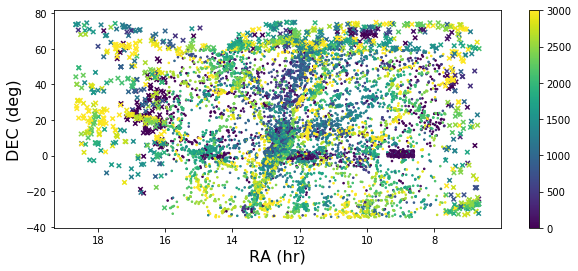

In [42]:
plt.figure(figsize=(10,4))
plt.scatter(hdat['al2000'],hdat['de2000'],c=hdat['vopt'],s=10,marker='.',vmin=0,vmax=3000)
# extended region
plt.scatter(ehdat['al2000'],ehdat['de2000'],c=ehdat['vopt'],s=20,marker='x',vmin=0,vmax=3000)
plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)

# Full Hyperleda Catalog #

Will query full region in one sql search

```
select
objname,objtype,de2000,al2000,v,e_v,vopt,e_vopt,vrad,e_vrad,bt,e_bt,type,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
where de2000 > -35 and de2000 < 75 and  al2000 < 280./360.*24.  and al2000 > 100./360.*24. and v < 3300 and objtype='G'


```

In [55]:
tablepath = '/Users/rfinn/github/Virgo/tables/'
fhfile = tablepath+'hyperleda-finn-11nov2019-full.csv'

In [56]:
fhdat = ascii.read(fhfile,delimiter=',',format='csv',header_start=0,data_start=1)

Text(0, 0.5, 'DEC (deg)')

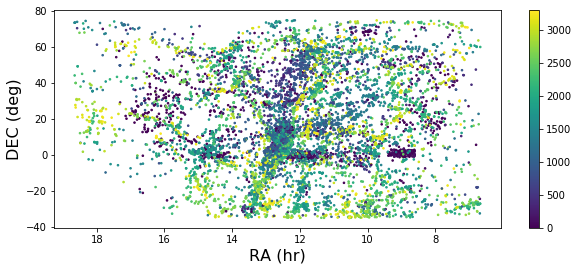

In [97]:
plt.figure(figsize=(10,4))
plt.scatter(fhdat['al2000'],fhdat['de2000'],c=fhdat['vopt'],s=10,marker='.',vmin=0,vmax=3300)
plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)

# Velocity Cut #

- We are using $v_r < 3300$ for the sample
- we should impose a low-z cutoff to avoid stars
- trying
$500 < v_r < 3300$

In [159]:
vflag = (fhdat['vopt'] > 500.) & (fhdat['de2000'] > -1.2)
print('total number in velocity cut = ',np.sum(vflag))

total number in velocity cut =  5690


Text(0, 0.5, 'DEC (deg)')

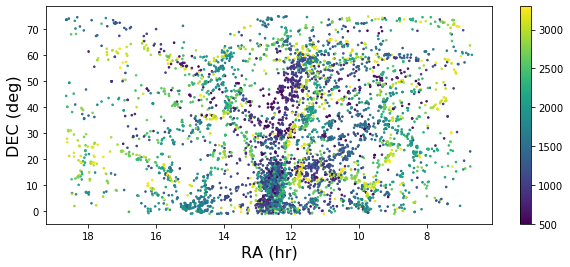

In [160]:

plt.figure(figsize=(10,4))
x = fhdat['al2000'][vflag]
y = fhdat['de2000'][vflag]
color = fhdat['vopt'][vflag]
plt.scatter(x,y,c=color,s=10,marker='.',vmin=500,vmax=3300)
plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)

# Add Positions of CO Sample #
- read in CO file
- overplot positions of CO sample

In [161]:
cfile = tablepath+'CO-MasterFile-2018Feb16.fits'
codat = fits.getdata(cfile)

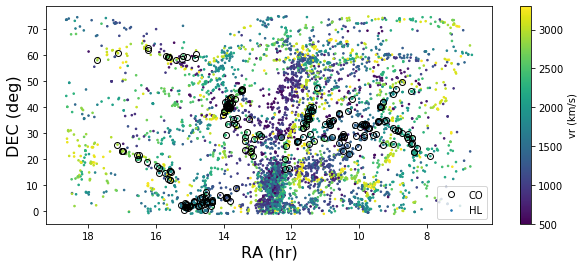

In [164]:
plt.figure(figsize=(10,4))
x = fhdat['al2000'][vflag]
y = fhdat['de2000'][vflag]
color = fhdat['vopt'][vflag]
plt.scatter(x,y,c=color,s=10,marker='.',vmin=500,vmax=3300,label='HL')

plt.plot(codat.RA/15.,codat.DEC,'ko',mfc='None',mec='k', label='CO')

plt.colorbar(label='vr (km/s)')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.savefig('../plots/hyperleda-CO.pdf')

# Match Hyperleda Catalog to NSA #

In [71]:
nsafile = '/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa = fits.getdata(nsafile)

In [165]:
decmin = -1.2 
decmax = 75 
ramax = 280.
ramin = 100. 
vmax = 3300.
vmin = 500.
nvflag = (nsa.Z*3.e5 > vmin) & (nsa.Z*3.e5 < vmax)
overlap = (nsa.RA > ramin) & (nsa.RA < ramax) & (nsa.DEC < decmax) & (nsa.DEC > decmin) & nvflag

In [166]:
nsasub = nsa[overlap]

In [167]:
len(nsasub)

5606

In [169]:
np.min(nsasub.DEC)

-1.1995853533203575

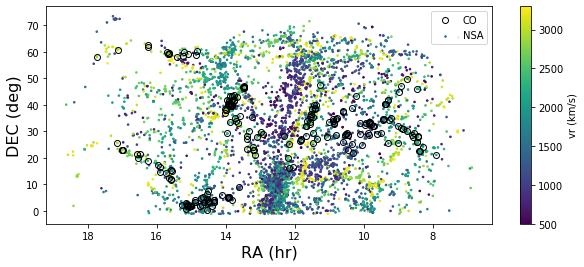

In [170]:
plt.figure(figsize=(10,4))
plt.scatter(nsasub.RA/15,nsasub.DEC,c=nsasub.Z*3.e5,s=10,marker='.',vmin=500,vmax=3300,label='NSA')

plt.plot(codat.RA/15.,codat.DEC,'ko',mfc='None',mec='k', label='CO')

plt.colorbar(label='vr (km/s)')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.savefig('../plots/NSA-CO.png')

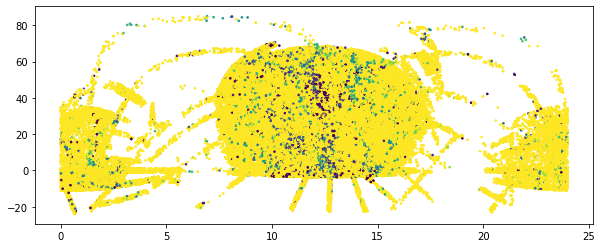

In [102]:
plt.figure(figsize=(10,4))
plt.scatter(nsa.RA/15,nsa.DEC,c=nsa.Z*3.e5,s=10,marker='.',vmin=500,vmax=3300,label='NSA')

# Comparison #

- 5690 Hyperleda sources
- 5606 NSA sources

Now time to match

In [171]:
hyper = fhdat[vflag]
print(len(hyper))

5690


In [172]:
hcoord = SkyCoord(hyper['al2000']*u.hr,hyper['de2000']*u.deg,frame='icrs')
ncoord = SkyCoord(nsa.RA*u.deg,nsa.DEC*u.deg,frame='icrs')

In [175]:
insa, d2d, d3d = hcoord.match_to_catalog_sky(ncoord)

In [176]:
matchflag = d2d < 10./3600*u.deg

In [177]:
sum(matchflag)

4497

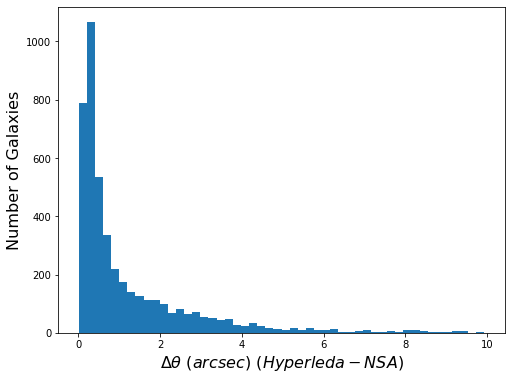

In [190]:
plt.figure(figsize=(8,6))
t=plt.hist(d2d.to('arcsec').value[matchflag],bins=50)
plt.xlabel(r'$ \Delta \theta \ (arcsec) \ (Hyperleda- NSA)$',fontsize=16)
plt.ylabel('Number of Galaxies',fontsize=16)
plt.savefig('../plots/hyperlead-nsa-offsets.png')

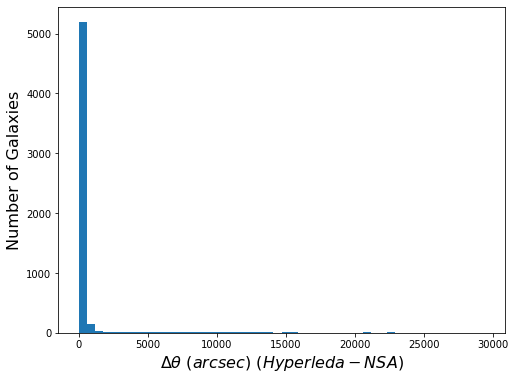

In [189]:
plt.figure(figsize=(8,6))
t=plt.hist(d2d.to('arcsec').value,bins=50)
plt.xlabel(r'$ \Delta \theta \ (arcsec) \ (Hyperleda- NSA)$',fontsize=16)
plt.ylabel('Number of Galaxies',fontsize=16)
plt.savefig('../plots/hyperlead-nsa-offsets-all.png')

In [193]:
# print out NSAID for d2d > 15"
flag = (d2d.to('arcsec').value < 15.) & (d2d.to('arcsec').value > 10.)


In [194]:
nsaindex = insa[flag]
print(len(nsa.NSAID[nsaindex]))

67


In [195]:
nsa.NSAID[nsaindex]

array([111836, 138778, 141332, 144906,  64408, 164201, 164358, 159146,
       140978, 143305,  51516,  73149,      7, 146839, 144978, 141611,
        66905, 117726,  51331, 156994, 162674, 169810,  66736, 143906,
       134400, 157217, 138364,  55778, 140699, 141287, 146433, 146492,
       146977, 163387, 135467,  64655, 135797, 158560, 124302, 142450,
       141618, 135606, 136132, 108114, 170500, 170614, 118577,  67282,
       141361, 145582, 165766,  92125, 141654, 143477, 140942, 143110,
       146352, 145372, 140931, 141609, 140895, 161845, 134906, 165451,
       148251, 141429,  52202], dtype=int32)

In [196]:
# make figure with color image cutout
# mark position of NSA object
# mark position of Hyperleda


In [197]:
 ascii.write([nsa.RA[nsaindex],nsa.DEC[nsaindex]], 'nsa-bigoffset.tbl', format='ipac',names=['RA','DEC'])  

In [198]:
ascii.write([hcoord.ra.deg[flag],hcoord.dec.deg[flag]], 'hyperleda-offset-10-15.tbl', format='ipac',names=['RA','DEC'])  

## Display Images of Offsets ##

In [374]:
def getlegacy(ra1,dec1,ra2=None,dec2=None):
    #url='http://legacysurvey.org/viewer/fits-cutout?ra='+str(ra1)+'&dec='+str(dec1)+'&layer=mzls+bass-dr6&pixscale=0.27&bands=r'
    url='http://legacysurvey.org/viewer/cutout.fits?ra='+str(ra1)+'&dec='+str(dec1)+'&layer=dr8&pixscale=1.00'
    #http://legacysurvey.org/viewer/cutout.fits?ra=156.2778&dec=28.0920&layer=dr8&pixscale=1.00
    #print(url)
    fname = 'hyper-nsa-test.fits'
    urlretrieve(url, fname)
    t,h = fits.getdata(fname,header=True)
    # write out r-band image
    fits.writeto('r-test.fits',t[1],header=h,overwrite=True)
    norm = simple_norm(t[1],stretch='asinh',percent=99.5)
    plt.imshow(t[1],origin='upper',cmap='gray_r', norm=norm)
    dx=20
    if ra2 is not(None):
        ra = np.array([ra1,ra2])
        dec = np.array([dec1,dec2])   
        w = WCS('r-test.fits')
        px,py = w.wcs_world2pix(ra,dec,0)
        #print(px,py)
        r1 = Rectangle((px[0]-dx/2, py[0]-dx/2), dx, dx, edgecolor='red', facecolor='none')
        r2 = Rectangle((px[1]-dx/2, py[1]-dx/2), dx, dx, edgecolor='blue', facecolor='none')
        plt.gca().add_patch(r1)
        plt.gca().add_patch(r2)
        

In [375]:
def plotimages(dmin,dmax):
    flag = (d2d.to('arcsec').value < dmax) & (d2d.to('arcsec').value > dmin)
    nsaindex = insa[flag]
    ra1 = hcoord.ra.deg[flag]
    dec1 = hcoord.dec.deg[flag]
    ra2 = nsa.RA[nsaindex]
    dec2 = nsa.DEC[nsaindex]
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        getlegacy(ra1[i],dec1[i],ra2[i],dec2[i])
        plt.axis([50,200,50,200])
        if i == 1:
            plt.title('HL-NSA Coords:'+str(dmin)+'-'+str(dmax)+' arcsec')
    plt.savefig('HL-NSA-'+str(dmin)+'-'+str(dmax)+'.png')

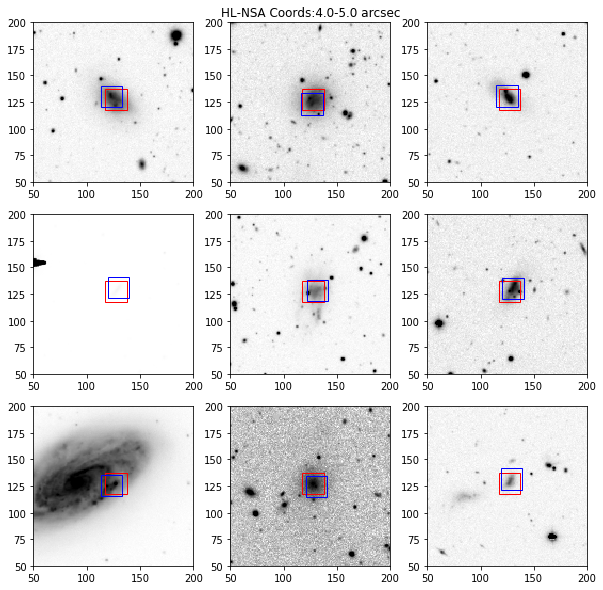

In [384]:
dmin=4.
dmax=5.
plotimages(dmin,dmax)

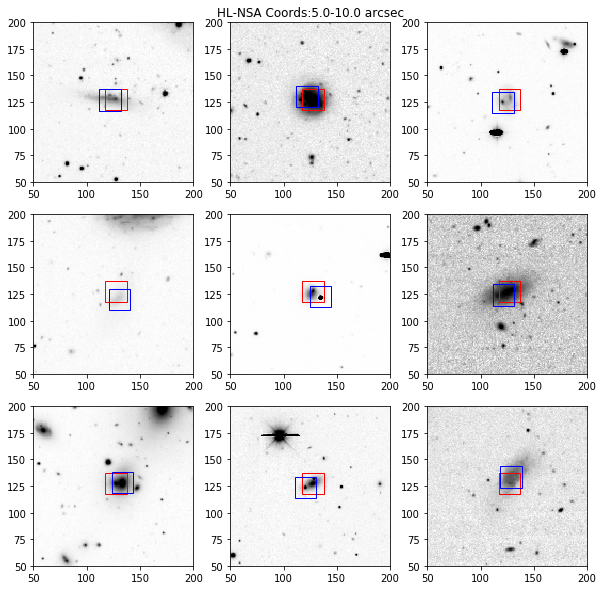

In [376]:
dmin=5.
dmax=10.
plotimages(dmin,dmax)

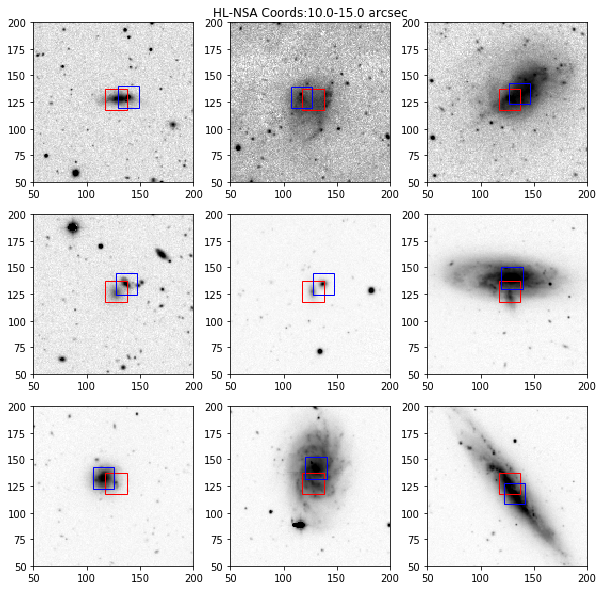

In [377]:
dmin=10.
dmax=15.
plotimages(dmin,dmax)

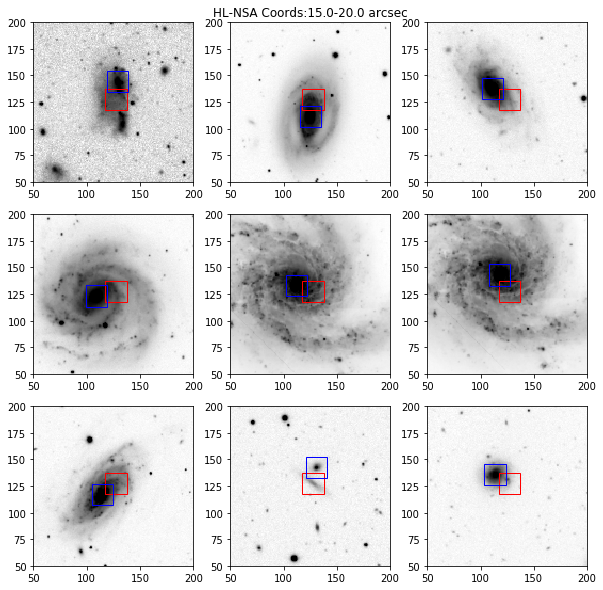

In [378]:
dmin=15.
dmax=20.
plotimages(dmin,dmax)

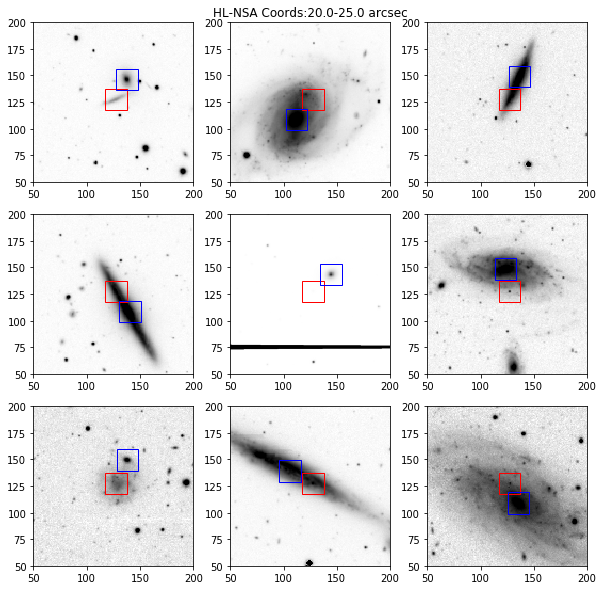

In [379]:
dmin=20.
dmax=25.
plotimages(dmin,dmax)

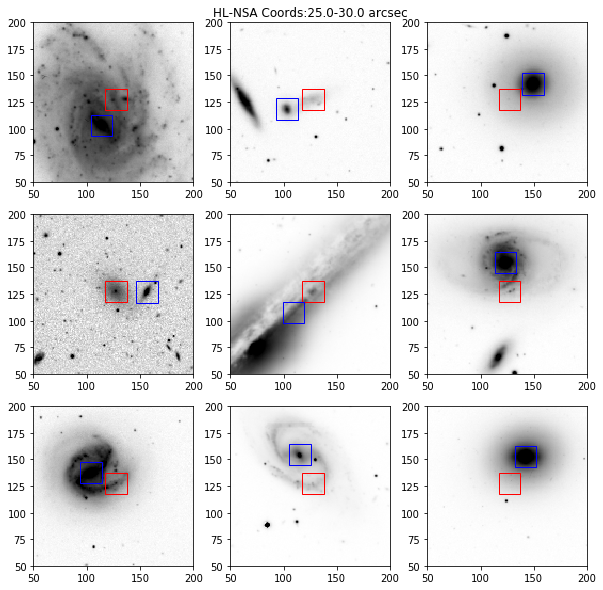

In [380]:
dmin=25.
dmax=30.
plotimages(dmin,dmax)

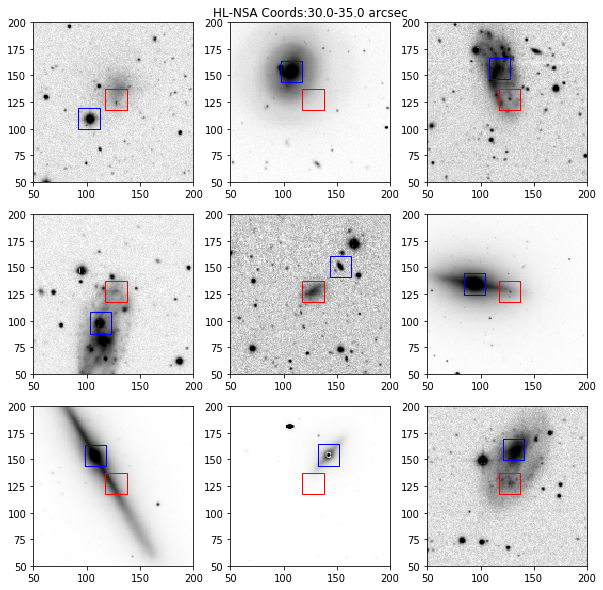

In [382]:
dmin=30.
dmax=35.
plotimages(dmin,dmax)

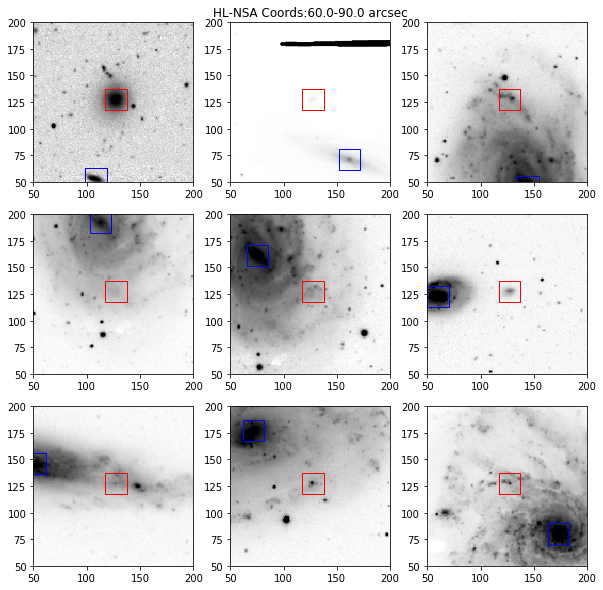

In [385]:
dmin=60.
dmax=90.
plotimages(dmin,dmax)

## Playing with Legacy Viewer ##

[50, 200, 50, 200]

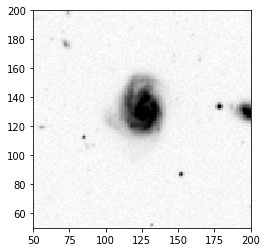

In [369]:
url = 'http://legacysurvey.org/viewer/fits-cutout?ra=154.7709&dec=46.4537&layer=mzls+bass-dr6&pixscale=0.27&bands=grz'
getlegacy(154.7709,46.4537)
plt.axis([50,200,50,200])

## Other Failed Experiments ##

In [208]:
ra = hcoord.ra.deg[0]
dec = hcoord.dec.deg[0]
impix = 200
imsize = 2*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=ra, dec=dec, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
urlretrieve(url, 'hyper-nsa-test.jpg')

('hyper-nsa-test.jpg', <http.client.HTTPMessage at 0x141bd0a90>)

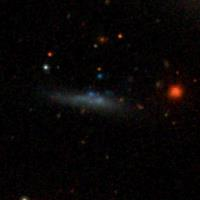

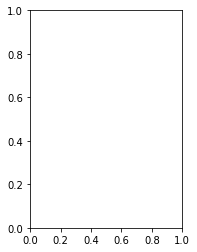

In [228]:
plt.figure()
plt.subplot(1,2,2)
IPython.display.Image('hyper-nsa-test.jpg')